# LFV Higgs decays in SeeSaw model

In this model the couplings that allows LFVHD are given by [Lepton flavor violating Higgs boson decays in seesaw models: New discussions](https://inspirehep.net/files/b569c392f2240d487f9731316b2d5ffc)

| Vertex|coupling&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|Vertex|coupling&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|
|-------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------|
|$h W^{+\mu} W^{-\nu}$|$i g m_{W} g_{\mu \nu}$|$h G_{W}^{+} G_{W}^{-}$|$\frac{-igm_h^2}{2 m_W}$|
|$h G_{W}^{+} {W}^{-\mu}$|$\frac{ig}{2}(p_{+}- p_0)_{\mu}$|$h G_{W}^{-} W^{+\mu}$|$\frac{i g}{2}\left(p_{0}-p_{-}\right)_{\mu}$|
|$\bar{n}_{i} e_{a} W_{\mu}^{+}$|$\frac{i g}{\sqrt{2}} U_{a i}^{\nu} \gamma^{\mu} P_{L}$|$\overline{e_{a}} n_{j} W_{\mu}^{-}$|$\frac{i g}{\sqrt{2}} U_{a j}^{\nu *} \gamma^{\mu} P_{L}$|
|$\bar{n}_{i} e_{a} G_{W}^{+}$|$-\frac{i g}{\sqrt{2} m_{W}} U_{a i}^{\nu}\left(m_{e_{a}} P_{R}-m_{n, i} P_{L}\right)$|$\overline{e_{a}} n_{j} G_{W}^{-}$|$-\frac{i g}{\sqrt{2} m_{W}} U_{a j}^{\nu *}\left(m_{e_{a}} P_{L}-m_{n, j} P_{R}\right)$|
|$h\overline{n_i}n_j$|$\frac{-i g}{2 m_W}\left[C_{i j}\left(P_{L} m_{n_{i}}+P_{R} m_{n_{j}}\right) \quad+C_{i j}^{*}\left(P_{L} m_{n_{j}}+P_{R} m_{n_{i}}\right)\right]$|$h\overline{e_a}e_a$|$\frac{-ig m_{e_a}}{2 m_W}$|

Because of these interactions 10 diagrams contributes to LFVHD in this model. All of them are summarized in the next table:

|No. |Structure   | $P_0$ | $P_1$ | $P_2$ |
|:------------:|:-------------:|:--------:|:---------:|:----------:|
|1 | SFF| $G_W$ | $\overline{n}_i$ | $n_j$  |
|2 | VFF| $W$ |$\overline{n}_i$ |  $n_j$  |
|3 | FSS| $n_i$  |$G_W$ |  $G_W$  |
|4 | FVS| $n_i$  |$W$ |  $G_W$ |
|5 | FSV| $n_i$  |$G_W$ |  $W$  |
|6 | FVV| $n_i$  |$W$ |  $W$ |
|7 | FV |$n_i$ |$W$ | --- |
|8 | FS|$n_i$  |$G_W$ |  ---  |
|9 | VF |$n_i$  | ---  | $W$ |
|10 | SF |$n_i$  | --- |  $G_W$  |


We will follow 6 main steps to calculates the the form factors to the 10 diagrams, as follows
 1. Define the symbolic variables like $g$, masses, indexes, etc.
 2. Create the vertexes representing each interaction.
 3. Create the Diagrams.
 4. Obtain form factors and the divergencies
 5. Handle the divergencies.

## Define symbolic variables

Importing sympy functions

In [1]:
from sympy import symbols, init_printing, I,pi,IndexedBase,sqrt,simplify
init_printing()

**Defining symbolic variables**

In [2]:
g = symbols('g',positive=True)
mW,mG = symbols('m_W,m_G',positive=True)


Uν = IndexedBase(r'{{U^\nu}}')
Uνc = IndexedBase(r'{{U^{\nu *}}}')
mn = IndexedBase(r'{{m_n}}')
#me = IndexedBase(r'{{m_e}}')
C = IndexedBase(r'C')
Cc = IndexedBase(r'{{C^*}}')
a,b,i,j = symbols('a,b,i,j',integer=True)

**Assigning masses of initial and final particles**

In [5]:
from ...vertexes import VertexSVV

ImportError: attempted relative import with no known parent package

In [4]:
mh = lfvhd.ma
me = {a:lfvhd.mi,b:lfvhd.mj}
me

## Defining vertexes

In [5]:
vertexhWW = VertexSVV(I*g*mW)
vertexhGG = lfvhd.VertexHSS((-I*g*mh**2)/(2*mW))

vertexhWG = lfvhd.VertexHVpSm(I*g/2)
vertexhGW = lfvhd.VertexHSpVm(I*g/2)

vertexneWu =lambda i,a: lfvhd.VertexVFF(0,I*g/sqrt(2)*Uν[a,i])
vertexenWd =lambda j,b: lfvhd.VertexVFF(0,I*g/sqrt(2)*Uνc[b,j])

vertexneGu = lambda i,a: lfvhd.VertexSFF((-I*g)/(sqrt(2)*mW)*me[a]*Uν[a,i],
                                         (I*g)/(sqrt(2)*mW)*mn[i]*Uν[a,i])

vertexenGd = lambda j,b: lfvhd.VertexSFF((I*g)/(sqrt(2)*mW)*mn[j]*Uνc[b,j],
                                         (-I*g)/(sqrt(2)*mW)*me[b]*Uνc[b,j])

vertexhnn = lambda i,j: lfvhd.VertexHF0F0((-I*g)/(2*mW)*(mn[j]*C[i,j] + mn[i]*Cc[i,j]),
                                          (-I*g)/(2*mW)*(mn[i]*C[i,j] + mn[j]*Cc[i,j]))

vertexhee = lambda a:lfvhd.VertexHFF((-I*g*me[a])/(2*mW))

## Create the diagrams

We reproduce the form factor of LFVHD in the seesaw model given in [Lepton flavor violating Higgs boson decays in seesaw models: New discussions](https://inspirehep.net/files/b569c392f2240d487f9731316b2d5ffc)

In [6]:
A = g**3/(64*pi**2*mW**3) # Favtor to simplify expressions
m = IndexedBase('m')
h,ea,eb = symbols('h,e_a,e_b');
cambios = {lfvhd.ma:m[h],lfvhd.mi:m[a],lfvhd.mj:m[b]}

### Triangles

In [7]:
triangleGninj = lfvhd.TriangleSFF(vertexhnn(i,j),vertexneGu(j,b),vertexenGd(i,a),[mW,mn[i],mn[j]])

triangleWninj = lfvhd.TriangleVFF(vertexhnn(i,j),vertexneWu(j,b),vertexenWd(i,a),[mW,mn[i],mn[j]])

triangleniWW = lfvhd.TriangleFVV(vertexhWW,vertexneWu(i,b),vertexenWd(i,a),[mn[i],mW,mW])

triangleniWG = lfvhd.TriangleFVS(vertexhWG,vertexneGu(i,b),vertexenWd(i,a),[mn[i],mW,mW])

triangleniGW = lfvhd.TriangleFSV(vertexhGW,vertexneWu(i,b),vertexenGd(i,a),[mn[i],mW,mW])

triangleniGG = lfvhd.TriangleFSS(vertexhGG,vertexneGu(i,b),vertexenGd(i,a),[mn[i],mW,mW])

### Bubbles

In [8]:
bubbleniW = lfvhd.BubbleFV(vertexhee(b),vertexneWu(i,b),vertexenWd(i,a),[mn[i],mW])

bubbleWni = lfvhd.BubbleVF(vertexhee(a),vertexneWu(i,b),vertexenWd(i,a),[mn[i],mW])

bubbleniG = lfvhd.BubbleFS(vertexhee(b),vertexneGu(i,b),vertexenGd(i,a),[mn[i],mW])

bubbleGni = lfvhd.BubbleSF(vertexhee(a),vertexneGu(i,b),vertexenGd(i,a),[mn[i],mW])

In [17]:
ALGn = bubbleGni.AL() + bubbleniG.AL()

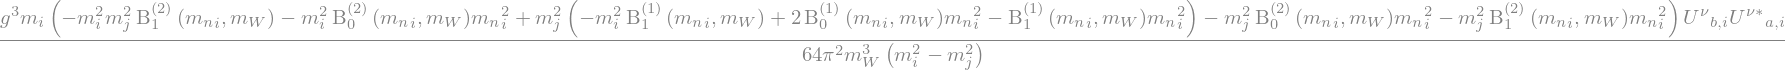

In [18]:
ALGn.simplify()

In [19]:
ALGnn = triangleGninj.AL().simplify()

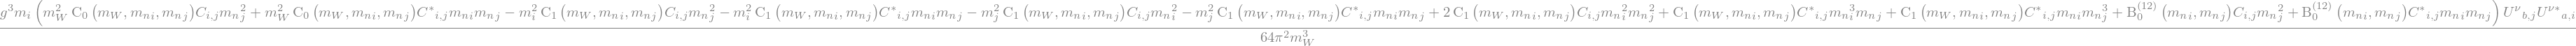

In [20]:
ALGnn

In [23]:
ALG = (ALGn + ALGnn).simplify()

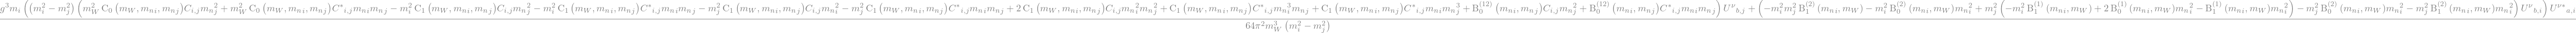

In [24]:
ALG

## Form factors and divergencies

In [9]:
def showFF(AL,AR,contribution):
    print(f'The form factor AL for contribution {contribution} is given by: \n')
    display(AL)
    print('*'*100)
    print('*'*100)
    print(f'The form factor AR for contribution {contribution} is given by: \n')
    display(AR)

### Triangle Gninj

The form factor AL for contribution Gninj is given by: 



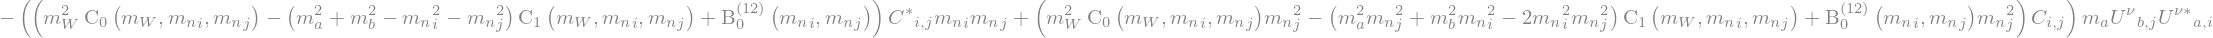

****************************************************************************************************
****************************************************************************************************
The form factor AR for contribution Gninj is given by: 



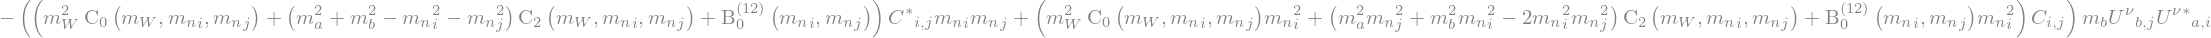

In [10]:
AL1 = (-triangleGninj.AL()/A).expand().collect([C[i,j],Cc[i,j]],simplify
                                              ).collect(triangleGninj.Cs).simplify().subs(cambios)

AR1 = (-triangleGninj.AR()/A).expand().collect([C[i,j],Cc[i,j]],simplify
                                              ).collect(triangleGninj.Cs).simplify().subs(cambios)
showFF(AL1,AR1,'Gninj')

The divergent term of the contribution Gninj is given by

In [11]:
DivL1 = AL1.subs(lfvhd.cambiosDivFin(mW,mn[i],mn[j])).expand(
).collect([lfvhd.Δe],evaluate=False)[lfvhd.Δe].simplify()*lfvhd.Δe

DivR1 = AR1.subs(lfvhd.cambiosDivFin(mW,mn[i],mn[j])).expand(
).collect([lfvhd.Δe],evaluate=False)[lfvhd.Δe].simplify()*lfvhd.Δe
print('The left divergent term of contribution Gninj is given by: \n')
display(DivL1)
# print('*'*100)
# print('*'*100)
print('The right divergent term of contribution Gninj is given by: \n')
display(DivR1)

The left divergent term of contribution Gninj is given by: 



The right divergent term of contribution Gninj is given by: 



### Triangle Wninj

In [12]:
AL2 = (-triangleWninj.AL().subs(lfvhd.D,4)/A).expand().collect(
    [C[i,j],Cc[i,j]],simplify).subs(cambios).simplify()

AR2 = (-triangleWninj.AR().subs(lfvhd.D,4)/A).expand().collect(
    [C[i,j],Cc[i,j]],simplify).subs(cambios).simplify()

showFF(AL2,AR2,'Wninj')

The form factor AL for contribution Wninj is given by: 



****************************************************************************************************
****************************************************************************************************
The form factor AR for contribution Wninj is given by: 



### Triangle niWW

**Left form factor**

In [13]:
AL3 = (-triangleniWW.AL().subs(lfvhd.D,4)/A).subs(cambios)
AR3 = (-triangleniWW.AR().subs(lfvhd.D,4)/A).subs(cambios)

showFF(AL3,AR3,'niWW')

The form factor AL for contribution niWW is given by: 



****************************************************************************************************
****************************************************************************************************
The form factor AR for contribution niWW is given by: 



### Triangle niWG

The form factor AL for contribution niWG is given by: 



****************************************************************************************************
****************************************************************************************************
The form factor AR for contribution niWG is given by: 



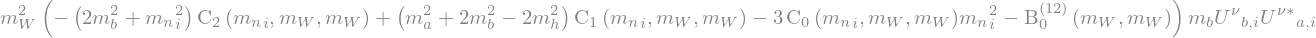

In [14]:
AL4 = (-triangleniWG.AL()/A).subs(lfvhd.D,4).expand().collect(triangleniWG.Cs,simplify).simplify(
).subs(cambios)

AR4 = (-triangleniWG.AR()/A).subs(lfvhd.D,4).expand().collect(triangleniWG.Cs,simplify).simplify(
).subs(cambios)

showFF(AL4,AR4,'niWG')

### Triangle niGW

The form factor AL for contribution niGW is given by: 



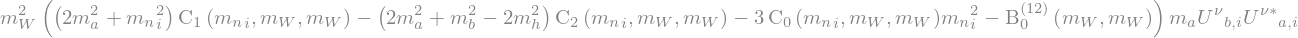

****************************************************************************************************
****************************************************************************************************
The form factor AR for contribution niGW is given by: 



In [15]:
AL5 = (-triangleniGW.AL()/A).subs(lfvhd.D,4).expand().collect(triangleniGW.Cs,simplify).simplify(
).subs(cambios)
AR5 = (-triangleniGW.AR()/A).subs(lfvhd.D,4).expand().collect(triangleniGW.Cs,simplify).simplify(
).subs(cambios)

showFF(AL5,AR5,'niGW')

### Triangle niGG

In [16]:
AL6 = (-triangleniGG.AL()/A).expand().collect([mn[i]],simplify
                                      ).simplify().subs(cambios)
AR6 = (-triangleniGG.AR()/A).expand().collect([mn[i]],simplify
                                  ).simplify().subs(cambios)

showFF(AL6,AR6,'niGG')

The form factor AL for contribution niGG is given by: 



****************************************************************************************************
****************************************************************************************************
The form factor AR for contribution niGG is given by: 



### Bubbles niW and Wni

**Left form factor**

The form factor AL for contribution niW is given by: 



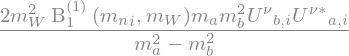

****************************************************************************************************
****************************************************************************************************
The form factor AR for contribution niW is given by: 



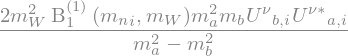

In [17]:
AL7 = (-bubbleniW.AL()/A).subs(lfvhd.D,4).subs(cambios)

AR7 = (-bubbleniW.AR()/A).subs(lfvhd.D,4).subs(cambios)

showFF(AL7,AR7,'niW')

The form factor AL for contribution Wni is given by: 



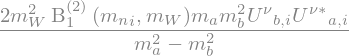

****************************************************************************************************
****************************************************************************************************
The form factor AR for contribution Wni is given by: 



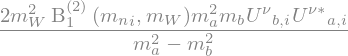

In [18]:
AL9 = (-bubbleWni.AL()/A).subs(lfvhd.D,4).subs(cambios).simplify()
AR9 = (-bubbleWni.AR()/A).subs(lfvhd.D,4).subs(cambios).simplify()

showFF(AL9,AR9, 'Wni')

#### Adding bubble niW y Wni

In [19]:
BniW_L =  (bubbleniW.AL() + bubbleWni.AL()).subs(lfvhd.D,4).simplify()
BniW_R =  (bubbleniW.AR() + bubbleWni.AR()).subs(lfvhd.D,4).simplify()
# BniW_L

When we add the contributions niW and Wni, we can split up the PV function in terms of finite and divergent parts. However , all the divergencies cancel each other and does not appear in the thi total form factors.

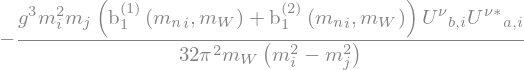

In [20]:
BniW_R.subs(lfvhd.cambiosDivFin(mn[i],mW,mW))

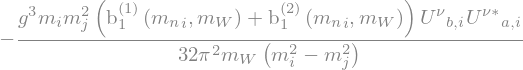

In [21]:
BniW_L.subs(lfvhd.cambiosDivFin(mn[i],mW,mW))

### Bubbles niG and Gni

The form factor AL for contribution niG is given by: 



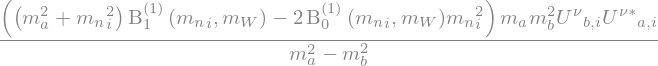

****************************************************************************************************
****************************************************************************************************
The form factor AR for contribution niG is given by: 



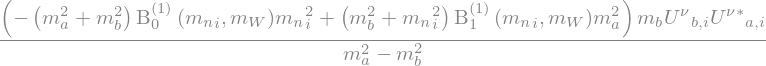

In [22]:
AL8 = (-bubbleniG.AL()/A).collect([
    lfvhd.B1_0(mn[i],mW),lfvhd.B1_1(mn[i],mW)]).simplify().subs(cambios)

AR8 = (-bubbleniG.AR()/A).collect([
    lfvhd.B1_0(mn[i],mW),lfvhd.B1_1(mn[i],mW)]).simplify().subs(cambios)

showFF(AL8, AR8, 'niG')

The form factor AL for contribution Gni is given by: 



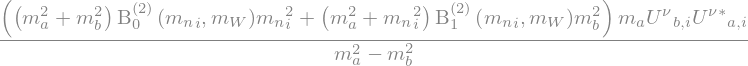

****************************************************************************************************
****************************************************************************************************
The form factor AR for contribution Gni is given by: 



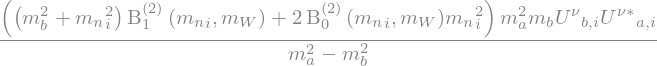

In [23]:
AL10 = (-bubbleGni.AL()/A).collect([
      lfvhd.B2_0(mn[i],mW),lfvhd.B2_1(mn[i],mW)]).simplify().subs(cambios)

AR10 = (-bubbleGni.AR()/A).collect([
    lfvhd.B2_0(mn[i],mW),lfvhd.B2_1(mn[i],mW)]).simplify().subs(cambios)

showFF(AL10, AR10, 'Gni')

## Handle the divergencies

In contrast to the case of bubbles niW and Wni when we add form factors of bubbles niG and Gni the divergencies continues as we show as follows:

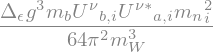

In [24]:
DivniG = ((AR8 + AR10).subs(lfvhd.cambiosDivFin(mn[i],mW,mW)).expand(
).collect(lfvhd.Δe,evaluate=False)[lfvhd.Δe]*lfvhd.Δe).simplify()*A
DivniG

To other side the divergent term of the right form factor to triangle Gninj is given by

In [25]:
DivR1

Although, it is not exolicit in this case we have a soble summation on the neutrino indexes i and j the we can demostrate follows [Lepton flavor violating Higgs boson decays in seesaw models: New discussions](https://inspirehep.net/files/b569c392f2240d487f9731316b2d5ffc), that 

\begin{align}\notag
Div\left[A_R^{(1)}\right]& = {m}_{b}\sum_{i,j = 1}^{K+3}   \left[\Delta_\epsilon m_{n_i}^{2} {{{C}}}_{ij} + \Delta_\epsilon  m_{n_i} m_{n_j}{C^*}_{ij} 
\right] \Delta_{ij}^{ab}\\ \notag
& = {m}_{b}\sum_{i,j = 1}^{K+3}   \left[ \Delta_\epsilon m_{n_i}^{2} {{{C}}}_{ij}\right] \Delta_{ij}^{ab}
\end{align}

To other side
\begin{align}\notag
\sum_{i,j = 1}^{6}  m_{n_{i}}^2{C}_{ij} \Delta_{ij}^{ab} &= \frac{g^{3}}{64 \pi^{2} m_{W}^{3}}\sum_{i,j = 1}^{6}\sum_{c=1}^{3} m_{n_{i}}^2U_{ci}^{\nu} U_{cj}^{\nu *} U_{bj}^{\nu} U_{ai}^{\nu *}\\ \notag
& = \frac{g^{3}}{64 \pi^{2} m_{W}^{3}}\sum_{i = 1}^{6}\sum_{c=1}^{3} m_{n_{i}}^2 U_{ci}^{\nu} U_{ai}^{\nu *}\sum_{j = 1}^{6}U_{bj}^{\nu}U_{cj}^{\nu *}\\ \notag
& = \frac{g^{3}}{64 \pi^{2} m_{W}^{3}}\sum_{i = 1}^{6}\sum_{c=1}^{3} m_{n_{i}}^2 U_{ci}^{\nu} U_{ai}^{\nu *}(U^{\nu}U^{\nu \dagger})_{bc}\\\label{ec:id-mni2}
& = \sum_{i = 1}^{K+3}m_{n_{i}}^2 \Delta_{ii}^{ab}
\end{align}

Then, the divergent term of $A_R^{(1)}$ is given by 
\begin{align}\notag
Div\left[A_R^{(1)}\right] &= {m}_{b}\Delta_\epsilon\sum_{i = 1}^{6}  m_{n_i}^{2} \Delta_{ii}^{ab}
\end{align}

In our code that is equivalent to do the next substitutions (in a practical way):

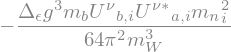

In [28]:
DivR1 = (DivR1*A).expand().subs(C[i,j],0).subs(cambios).subs({Cc[i,j]:1,Uν[b,j]:Uν[b,i],mn[j]:mn[i]})
DivR1

Then, the divergencies of bubbles niG and Gni are canceled with the divergencie of triangle Gninj.

In [30]:
(DivniG + DivR1).simplify()